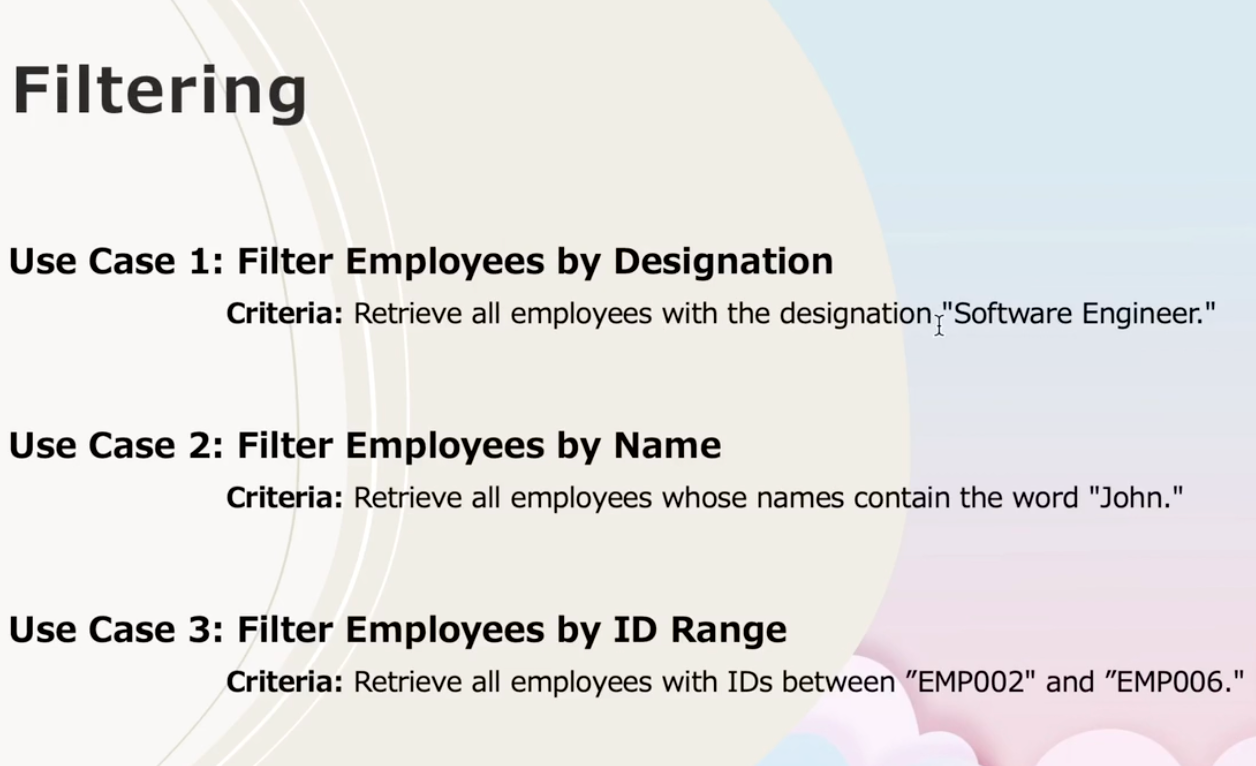

pip install django_filter

### `django-filter` package 
Integrates with Django REST Framework (DRF) to provide powerful and flexible filtering capabilities for your APIs.

**What is `django-filter`?**

`django-filter` is a third-party Django package that simplifies the process of creating filters for your QuerySets based on request parameters. It takes care of:

* **Parsing Request Parameters:** It automatically extracts filtering parameters from URL query strings.
* **Applying Filters to QuerySets:** It builds the necessary Django `filter()` calls to retrieve the relevant data.
* **Providing a Declarative Syntax:** It allows you to define filtering logic using a clean, Pythonic, and declarative approach.

**Why Use `django-filter` in DRF?**

* **Simplified Filtering:** It greatly reduces the amount of boilerplate code you'd otherwise need to write for filtering.
* **Flexibility:** It supports various filter types (exact matches, ranges, contains, etc.) and allows you to create custom filters.
* **Consistency:** It provides a consistent interface for filtering across different endpoints.
* **Easy Integration:** It's designed to work seamlessly with DRF.



**Installation**

First, install the package:

```bash
pip install django-filter
```

Then, add it to your `INSTALLED_APPS` in `settings.py`:

```python
# settings.py
INSTALLED_APPS = [
    ...
    'django_filters',
    ...
]
```



**Basic Usage with DRF**

Let's use our `Book` model to see how this works:

```python
# models.py
from django.db import models

class Book(models.Model):
    title = models.CharField(max_length=200)
    author = models.CharField(max_length=100)
    genre = models.CharField(max_length=50)
    publication_year = models.IntegerField()
    price = models.DecimalField(max_digits=6, decimal_places=2)

    def __str__(self):
      return self.title
```



**1. Create a `FilterSet`**

You define your filtering logic in a `FilterSet`. Create a `filters.py` (or similar) file in your app:

```python
# filters.py
import django_filters
from .models import Book

class BookFilter(django_filters.FilterSet):
    title = django_filters.CharFilter(lookup_expr='icontains')
    author = django_filters.CharFilter(lookup_expr='icontains')
    genre = django_filters.CharFilter(lookup_expr='iexact')
    min_publication_year = django_filters.NumberFilter(field_name='publication_year', lookup_expr='gte')
    max_publication_year = django_filters.NumberFilter(field_name='publication_year', lookup_expr='lte')
    min_price = django_filters.NumberFilter(field_name='price', lookup_expr='gte')
    max_price = django_filters.NumberFilter(field_name='price', lookup_expr='lte')

    class Meta:
        model = Book
        fields = ['title', 'author', 'genre', 'publication_year', 'price']
```

**Explanation:**

*   We import `django_filters` and our `Book` model.
*   We create a `BookFilter` class that inherits from `django_filters.FilterSet`.
*   We define filter fields by adding attributes to the class. For example:
    *   `title`: Filters book titles based on case-insensitive substring matching.
    *   `author`: Filters authors based on case-insensitive substring matching.
    *    `genre`: Filters genres based on case-insensitive exact match.
    *   `min_publication_year` and `max_publication_year`: Filters by range for publication years.
    *   `min_price` and `max_price`: Filters by range for prices
*   We set the `model` and `fields` in the `Meta` class, specifying which fields of the model are available for filtering



**2. Use the `FilterSet` in your DRF View**

Now, in your DRF view, add `filter_backends` and specify your `filterset_class`:

```python
# views.py
from rest_framework import generics
from django_filters.rest_framework import DjangoFilterBackend
from .models import Book
from .serializers import BookSerializer
from .filters import BookFilter

class BookListView(generics.ListAPIView):
    queryset = Book.objects.all()
    serializer_class = BookSerializer
    filter_backends = [DjangoFilterBackend]
    filterset_class = BookFilter
```

**Explanation**
*   We import `DjangoFilterBackend`
*   We set the `filter_backends` to a list including the `DjangoFilterBackend`
*   We set the `filterset_class` to our `BookFilter` defined previously



**3. Usage**

Now, you can filter the Book list using query parameters:

*   `GET /api/books/?title=war` (Books with "war" in the title)
*   `GET /api/books/?author=Tolstoy` (Books with "Tolstoy" in the author field)
*   `GET /api/books/?genre=fiction` (Books in the "fiction" genre)
*   `GET /api/books/?min_publication_year=2000&max_publication_year=2010` (Books published between 2000 and 2010, inclusive)
*   `GET /api/books/?min_price=10&max_price=20` (Books priced between 10 and 20, inclusive)
*   Combining filters is also supported `GET /api/books/?author=tolstoy&genre=fiction`

`django-filter` handles the rest by building the appropriate Django `filter()` calls.



**Custom Filters**

`django-filter` also supports custom filters:

```python
# filters.py
import django_filters
from django import forms
from .models import Book

class BookFilter(django_filters.FilterSet):

    publication_year_range = django_filters.RangeFilter(field_name='publication_year', widget=forms.TextInput(attrs={'placeholder':'YYYY-YYYY'}))

    class Meta:
        model = Book
        fields = ['publication_year_range', 'title', 'author']
```

Now you can access the filter using `publication_year_range` as a query parameter. For example: `GET /api/books/?publication_year_range=2000-2010`
*   The custom range filter takes a range in the form of `start-end`
*   It sets a placeholder in the input field to show the correct format



**Benefits**
*   The flexibility of custom filters allows for advanced filtering.

**Key Features**

*   **Different Filter Types:** `CharFilter`, `NumberFilter`, `BooleanFilter`, `DateFilter`, `DateTimeFilter`, `ChoiceFilter`, and more.
*   **Lookup Expressions:** Fine-grained filtering with `__exact`, `__contains`, `__gt`, etc.
*   **Custom Filters:** Allows you to create your own filtering logic.
*   **Field Names:** Specifies which model fields the filters apply to.
*   **Form Display:** If you choose to use the filter set as a form (e.g., to generate HTML forms) the widgets defined in the filters will be used.



**Advanced Techniques**

*   **ModelChoiceFilter, ModelMultipleChoiceFilter** For filtering based on foreign keys.
*   **Method-based Custom filters** For filtering based on data manipulation, for example.
* **Ordering:** `django-filter` can also handle ordering by specifying the ordering fields
    *   This functionality can also be achieved using `rest_framework.filters.OrderingFilter` which can be used in conjunction with `django-filter` or independently.

**In Summary**

`django-filter` with DRF makes building robust and filterable APIs much more straightforward. It handles the complexity of parsing, validating, and applying filters, allowing you to focus on the core logic of your application. By using `FilterSet` classes, `DjangoFilterBackend`, and custom filters, you can enable a wide range of filtering options for your API endpoints.
